<a href="https://colab.research.google.com/github/HannahMwende/Face-detection/blob/main/face_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Face detection system
This project implements a computer vision system designed to automatically detect a specific human face from images. By leveraging a pre-trained Haar Cascade classifier, the system efficiently identifies facial features within an image and draws bounding boxes around the detected faces. The system is built using OpenCV, a popular computer vision library, and aims to provide an intuitive solution for face recognition.

###Importing libraries

In [ ]:
#Importing libraries
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import joblib
from google.colab.patches import cv2_imshow

#### Loading data

In [ ]:
#Connecting colab to gooogle drive
from google.colab import drive
drive.mount('/content/drive')

 #Printing contents of train_data folder
print(os.listdir("/content/drive/MyDrive/Face_detection/Data/Train_data"))

Mounted at /content/drive
['download.jpg', 'download (1).jpg', 'download (2).jpg', 'obama1.jpg', 'obama2.jpeg', 'obama3.jpeg', 'obama4.jpeg', 'obama5.jpeg', 'obama6.jpeg', 'obama7.jpeg', 'obama8.jpeg', 'obama9.jpeg', 'obama10.jpeg', 'obama11.jpeg', 'obama12.jpeg', 'obama13.jpeg', 'obama14.jpeg', 'obama15.jpeg', 'obama16.jpeg', 'obama17.jpeg', 'obama18.jpeg']


In [ ]:
# Define paths
input_folder = "/content/drive/MyDrive/Face_detection/Data/Train_data"
output_folder = "/content/drive/MyDrive/Face_detection/Data/Clean_data"

# Load a pre-trained Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


#Loop through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        input_path = os.path.join(input_folder, filename)

The Haar Cascade classifier that is built into OpenCV has already been trained on a large dataset of human faces, so no further training is required. We just need to load the classifier from the library and use it to perform face detection on an input image.

###Image prepocessing

To improve computational efficiency, we first need to convert this image to grayscale before performing face detection on it:


The detectMultiScale() method is used to identify faces of different sizes in the input image.

scaleFactor:
This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image size by 10%.





In [ ]:
# Read the image
image = cv2.imread(input_path)

#Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) > 0:
    for (x, y, w, h) in faces:
        # Crop and resize face region
        face = gray_image[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (100, 100))

    # Normalize pixel values
        face_normalized = face_resized
    # Save processed face
        output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.jpg")

else:
            print(f"No faces found in {filename}")

###Training the model

In [ ]:
features = []
labels = []

# Load processed images and labels
for idx, filename in enumerate(os.listdir(output_folder)):
    if filename.endswith('.jpg'):
        img_path = os.path.join(output_folder, filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        features.append(image.flatten())  # Flatten the 100x100 image
        labels.append(1)  # Label all images as 'Obama' (label = 1)

features = np.array(features)
labels = np.array(labels)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(features, labels)
print("KNN model trained successfully!")

# Mapping of labels
mapping = {1: "Obama"}

KNN model trained successfully!


In [ ]:
labels

array([1, 1, 1])

In [ ]:
# Save the trained KNN model
model_path = "knn_model.joblib"
joblib.dump(knn, model_path)
print(f"KNN model saved to {model_path}")

KNN model saved to knn_model.joblib


KNN model loaded successfully!
Prediction for test1.jpeg: [1]


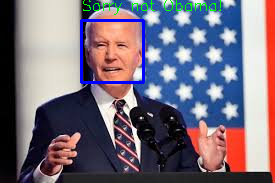

Prediction for test2.jpeg: [1]


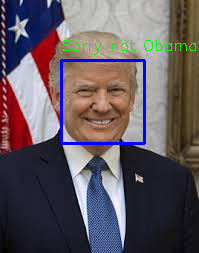

Prediction for test3.jpeg: [1]


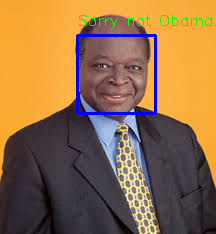

Prediction for test4.jpeg: [1]


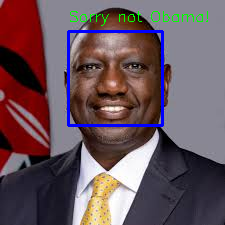

Prediction for test5.jpeg: [1]


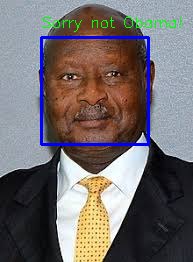

Prediction for test6.jpeg: [1]


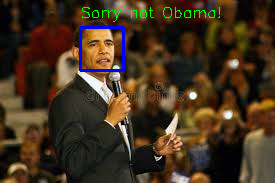

Prediction for test7.jpeg: [1]


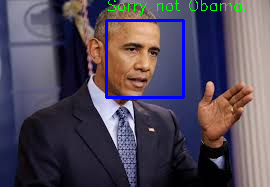

Prediction for test8.jpeg: [1]


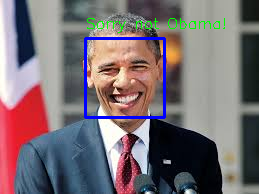

Prediction for test9.jpeg: [1]


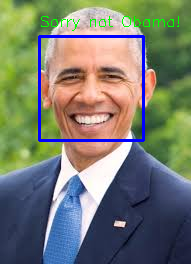

Prediction for test10.jpeg: [1]


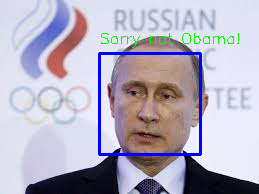

Prediction for test11.jpeg: [1]


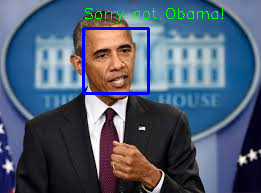

Prediction for test12.jpeg: [1]


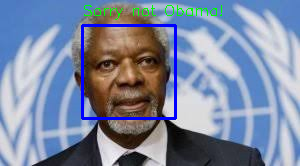

Prediction for test13.jpeg: [1]


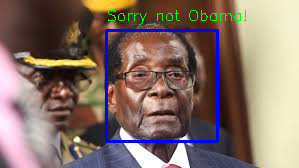

Prediction for test14.jpeg: [1]


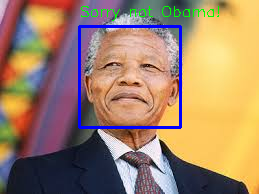

No faces detected in test15.jpeg
Prediction for test16.jpeg: [1]


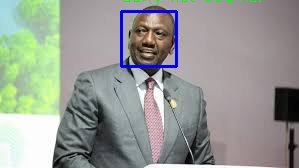

Prediction for test17.jpeg: [1]


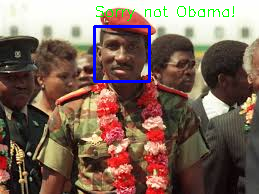

Prediction for test18.jpeg: [1]


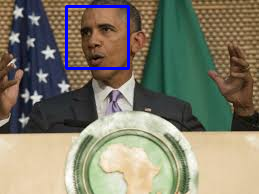

Prediction for test19.jpeg: [1]


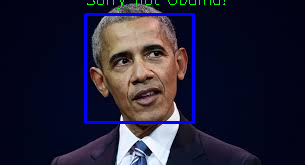

Prediction for test20.jpeg: [1]


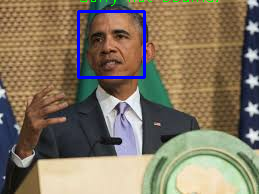

Prediction for test21.jpeg: [1]


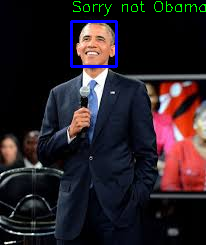

No faces detected in test22.jpeg
Prediction for test23.jpeg: [1]


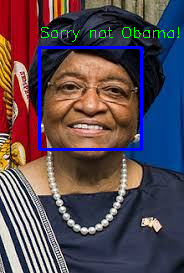

Prediction for test24.jpeg: [1]


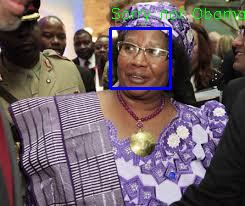

Prediction for test25.jpeg: [1]


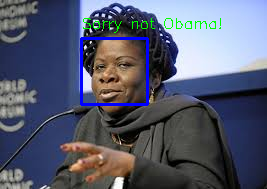

In [ ]:
#Test the Model on New Images
# Load the saved model
knn = joblib.load(model_path)
print("KNN model loaded successfully!")

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


# Define the test image folder
test_folder = "/content/drive/MyDrive/Face_detection/Data/Test_data"

# Loop through each test image
for filename in os.listdir(test_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Check for valid image files
        test_path = os.path.join(test_folder, filename)

        # Read and preprocess the image
        test_image = cv2.imread(test_path)
        gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

        # Detect faces in the test image
        faces = face_cascade.detectMultiScale(gray_test_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(faces) > 0:
            for (x, y, w, h) in faces:
                # Extract and preprocess the face region
                face = gray_test_image[y:y+h, x:x+w]
                face_resized = cv2.resize(face, (100, 100))
                face_flattened = face_resized.flatten().reshape(1, -1)  # Flatten and reshape

                # Predict the label using the KNN model
                prediction = knn.predict(face_flattened)
                print(f"Prediction for {filename}: {prediction}")

               # Define the label directly for the single class

                predicted_name = "Obama" if int(prediction[0]) == 0 else "Sorry not Obama!"



                # Annotate the test image
                cv2.putText(test_image, predicted_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
                cv2.rectangle(test_image, (x, y), (x+w, y+h), (255, 0, 0), 2)


            # Show the annotated image
            cv2_imshow(test_image)


        else:
            print(f"No faces detected in {filename}")